In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas

sns.set_style("whitegrid", {"font.family": "DejaVu Sans"})
sns.set(palette="pastel", color_codes=True)
sns.set_context("poster")

%matplotlib inline

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

In [3]:
path = 'data/'
filename_DB = 'DeBruijn_alpha.json'
filename_pUC19 = 'pUC19_alpha.json'
filename_M13 = 'M13_square.json'
filename_DB7k = 'DB_7k_square.json'

#filename_DB_small = 'DB_small.csv'
#filename_pUC19 =
#filename_M13 =
#filename_lambda =

DB_small = pandas.read_csv(path + 'DB_small.csv')
DB_medium = pandas.read_csv(path + 'DB_medium.csv')
DB_large = pandas.read_csv(path + 'DB_large.csv')
pUC19_small = pandas.read_csv(path + 'pUC19_small.csv')
M13_medium = pandas.read_csv(path + 'M13_medium.csv')
lambda_large = pandas.read_csv(path + 'lambda_large.csv')

DB_small['size'] = 'small'
DB_medium['size'] = 'medium'
DB_large['size'] = 'large'
pUC19_small['size'] = 'small'
M13_medium['size'] = 'medium'
lambda_large['size'] = 'large'

DB_small['origin']= 'DBS'
DB_medium['origin']= 'DBS'
DB_large['origin']= 'DBS'
pUC19_small['origin']= 'viral'
M13_medium['origin']= 'viral'
lambda_large['origin']= 'viral'

data = pandas.concat([DB_small, DB_medium, DB_large, pUC19_small, M13_medium, lambda_large])

#filtering sequences
#data = data[data.sequence == 8]
data = data[data['sequence'].map(len) == 8]

print data

               id  sequence  probability   size origin
5        stp_42_0  TTGCATTC        0.855  small    DBS
6        stp_42_2  GCGGTTTT        0.896  small    DBS
10       stp_43_0  CGTACACA        0.901  small    DBS
11       stp_43_2  CAATCGTA        0.801  small    DBS
21       stp_64_0  AATTTTTC        0.782  small    DBS
25       stp_66_0  AAAGGACG        0.942  small    DBS
27       stp_67_0  GCAGAGAC        0.929  small    DBS
30       stp_68_2  GTTTCCTG        0.843  small    DBS
33       stp_69_2  ACCATCTT        0.876  small    DBS
39       stp_24_0  CTTCTGTA        0.878  small    DBS
40       stp_24_2  AACTTAGC        0.903  small    DBS
42       stp_25_0  AAGTCTTC        0.790  small    DBS
43       stp_25_2  TGAGTCCC        0.963  small    DBS
45       stp_26_0  AATACGCT        0.685  small    DBS
46       stp_26_2  CTCCCTTG        0.899  small    DBS
48       stp_27_0  GCCACTTT        0.882  small    DBS
49       stp_27_2  AAGAAGAA        0.685  small    DBS
51       s

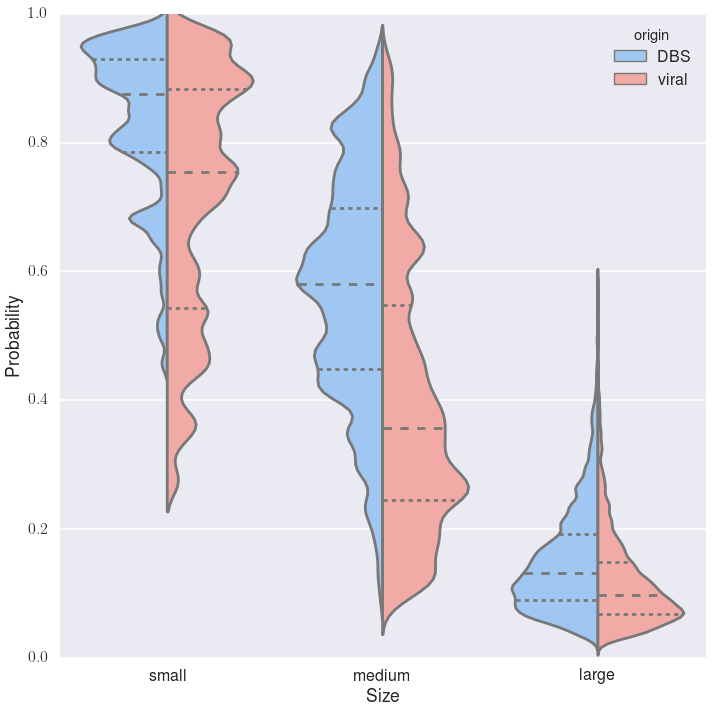

In [154]:
fig = plt.figure(figsize=(10, 10))

sns.violinplot(x="size", y="probability", hue="origin", data=data, split=True,
                palette={"DBS": "b", "viral": "r"}, scale="width", inner="quartiles", bw=.1)

sns.despine(left=True)
plt.tight_layout()
plt.ylim(0,1)
#plt.xlim(0,1)
plt.ylabel('Probability')
plt.xlabel('Size')
plt.show()

In [102]:
path = 'data/'
filename_DB = 'DeBruijn_alpha.json'
filename_pUC19 = 'pUC19_alpha.json'
filename_M13 = 'M13_square.json'
filename_DB7k = 'DB_7k_square.json'

DB_small = seaborn.ree

#ids, sequences, energies
#_, _, energies_DB = read_data(path + filename_DB)
#_, _, energies_pUC19 = read_data(path + filename_pUC19)
#_, _, energies_M13 = read_data(path + filename_M13)

_, _, energies_DB_short = read_data(path + filename_DB, short=True)
_, _, energies_pUC19_short = read_data(path + filename_pUC19, short=True)
_, _, energies_M13_short = read_data(path + filename_M13, short=True)
_, _, energies_DB7k_short = read_data(path + filename_DB7k, short=True)

#DB_dist_2 = get_boltzmann_distribution(d[:2] for d in energies_DB_short)
#pUC19_dist_2 = get_boltzmann_distribution(d[:2] for d in energies_pUC19_short)
#M13_dist_2 = get_boltzmann_distribution(d[:2] for d in energies_M13_short)

#DB_dist_10 = get_boltzmann_distribution(d[:10] for d in energies_DB_short)
#pUC19_dist_10 = get_boltzmann_distribution(d[:10] for d in energies_pUC19_short)
#M13_dist_10 = get_boltzmann_distribution(d[:10] for d in energies_M13_short)

#DB_dist_100 = get_boltzmann_distribution(d[:100] for d in energies_DB_short)
#pUC19_dist_100 = get_boltzmann_distribution(d[:100] for d in energies_pUC19_short)
#M13_dist_100 = get_boltzmann_distribution(d[:100] for d in energies_M13_short)

DB_dist_all = get_boltzmann_distribution(d for d in energies_DB_short)
pUC19_dist_all = get_boltzmann_distribution(d for d in energies_pUC19_short)
M13_dist_all = get_boltzmann_distribution(d for d in energies_M13_short)
DB7k_dist_all = get_boltzmann_distribution(d for d in energies_DB7k_short)

#DB_dist = get_boltzmann_distribution(d[:100] for d in energies_DB_short)
#pUC19_dist = get_boltzmann_distribution(d[:100] for d in energies_pUC19_short)
#M13_dist = get_boltzmann_distribution(d[:100] for d in energies_M13_short)

#DB_dist = get_boltzmann_distribution(energies_DB_short)
#pUC19_dist = get_boltzmann_distribution(energies_pUC19_short)

#dist = [d[0] for d in DB_dist]

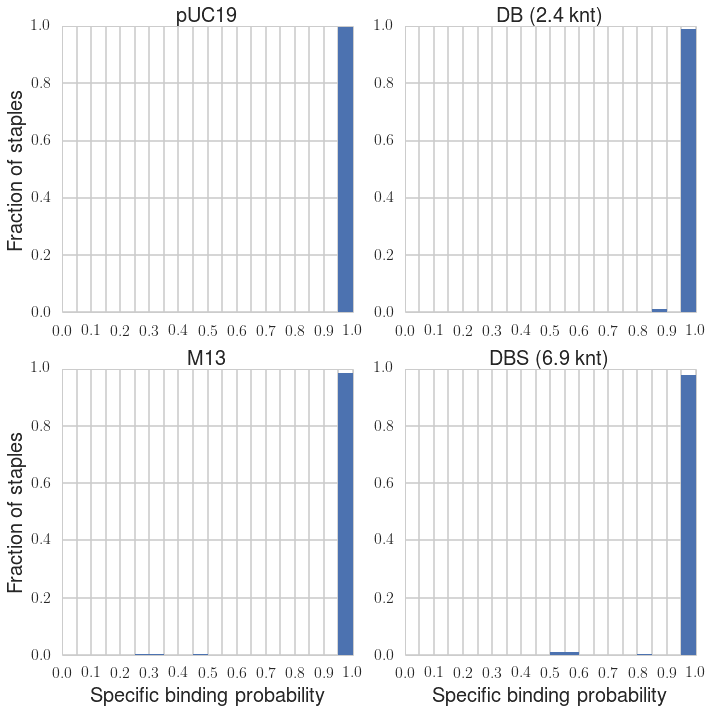

In [106]:
plt.close('all')

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)

data_set = OrderedDict()
data_set['pUC19 (all)'] = pUC19_dist_all
data_set['DB (all)'] = DB_dist_all
data_set['M13 (all)'] = M13_dist_all
data_set['DB7k (all)'] = DB7k_dist_all

xlabel = r'Specific binding probability'
ylabel = r'Fraction of staples'

distribution_plot(ax1, r'pUC19', pUC19_dist_all, '', ylabel)
distribution_plot(ax2, r'DB (2.4 knt)', DB_dist_all, '', '')
distribution_plot(ax3, r'M13', M13_dist_all, xlabel, ylabel)
distribution_plot(ax4, r'DBS (6.9 knt)', DB7k_dist_all, xlabel, '')

#%matplotlib inline

fig.set_size_inches(10, 10)

plt.tight_layout()
plt.savefig("/home/j3ny/repos/analysis/Analysis/thermodynamic_addressability/output/addressability_comparison.pdf",format='pdf',dpi=600)
#plt.savefig("/home/j3ny/repos/analysis/Analysis/thermodynamic_addressability/output/addressability_comparison_long.pdf",format='pdf',dpi=600)


### Code to convert the data from energies to probabilities

In [7]:
## CONVERT DATA

path = 'data/'
filename_DB = 'DeBruijn_alpha.json'
filename_pUC19 = 'pUC19_alpha.json'
filename_M13 = 'M13_square.json'
filename_DB7k = 'DB_7k_square.json'

#ids, sequences, energies = read_data(path + filename_DB7k, short=True)
dist_all = get_boltzmann_distribution(d for d in energies)

with open('data/DB_medium.csv', 'w') as out:
    for i in range(len(ids)):
        out.write(ids[i] + ',' + sequences[i] + ',')
        out.write('%.3f' % dist_all[i][0])
        out.write('\n')
    #print idsi], sequences[i], energies_DB_short[i], DB_dist_all[i]

NameError: name 'energies' is not defined

In [6]:
def get_boltzmann_distribution(energy_by_arm):
    R = 8.3144621  # gas constant
    T = 293.15  # room temperature
    factor = 4184.0  # joules_per_kcal
    boltzmann_distribution = []
    for dG in energy_by_arm:
        ps = []
        total = bigfloat.BigFloat(0)
        for energy in dG:
            p = bigfloat.exp((-energy*factor)/(R*T), bigfloat.precision(1000))
            ps.append(p)
            total = bigfloat.add(total, p)
        normal_ps = []
        for p in ps:
            normal_ps.append(float(bigfloat.div(p,total)))
        boltzmann_distribution.append(numpy.array(normal_ps))
    return boltzmann_distribution